In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

In [3]:
df = pd.read_csv('heart.csv')
df['target'].sum()
#df.isnull().sum()

165

In [4]:
y=df['target']

In [5]:
df.drop(['target'], axis=1, inplace = True)
#df.sort_values('age')tr

In [6]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.2,
random_state=None)

tree = DecisionTreeClassifier(random_state=None)


tree.fit(X_train, y_train)


DecisionTreeClassifier()

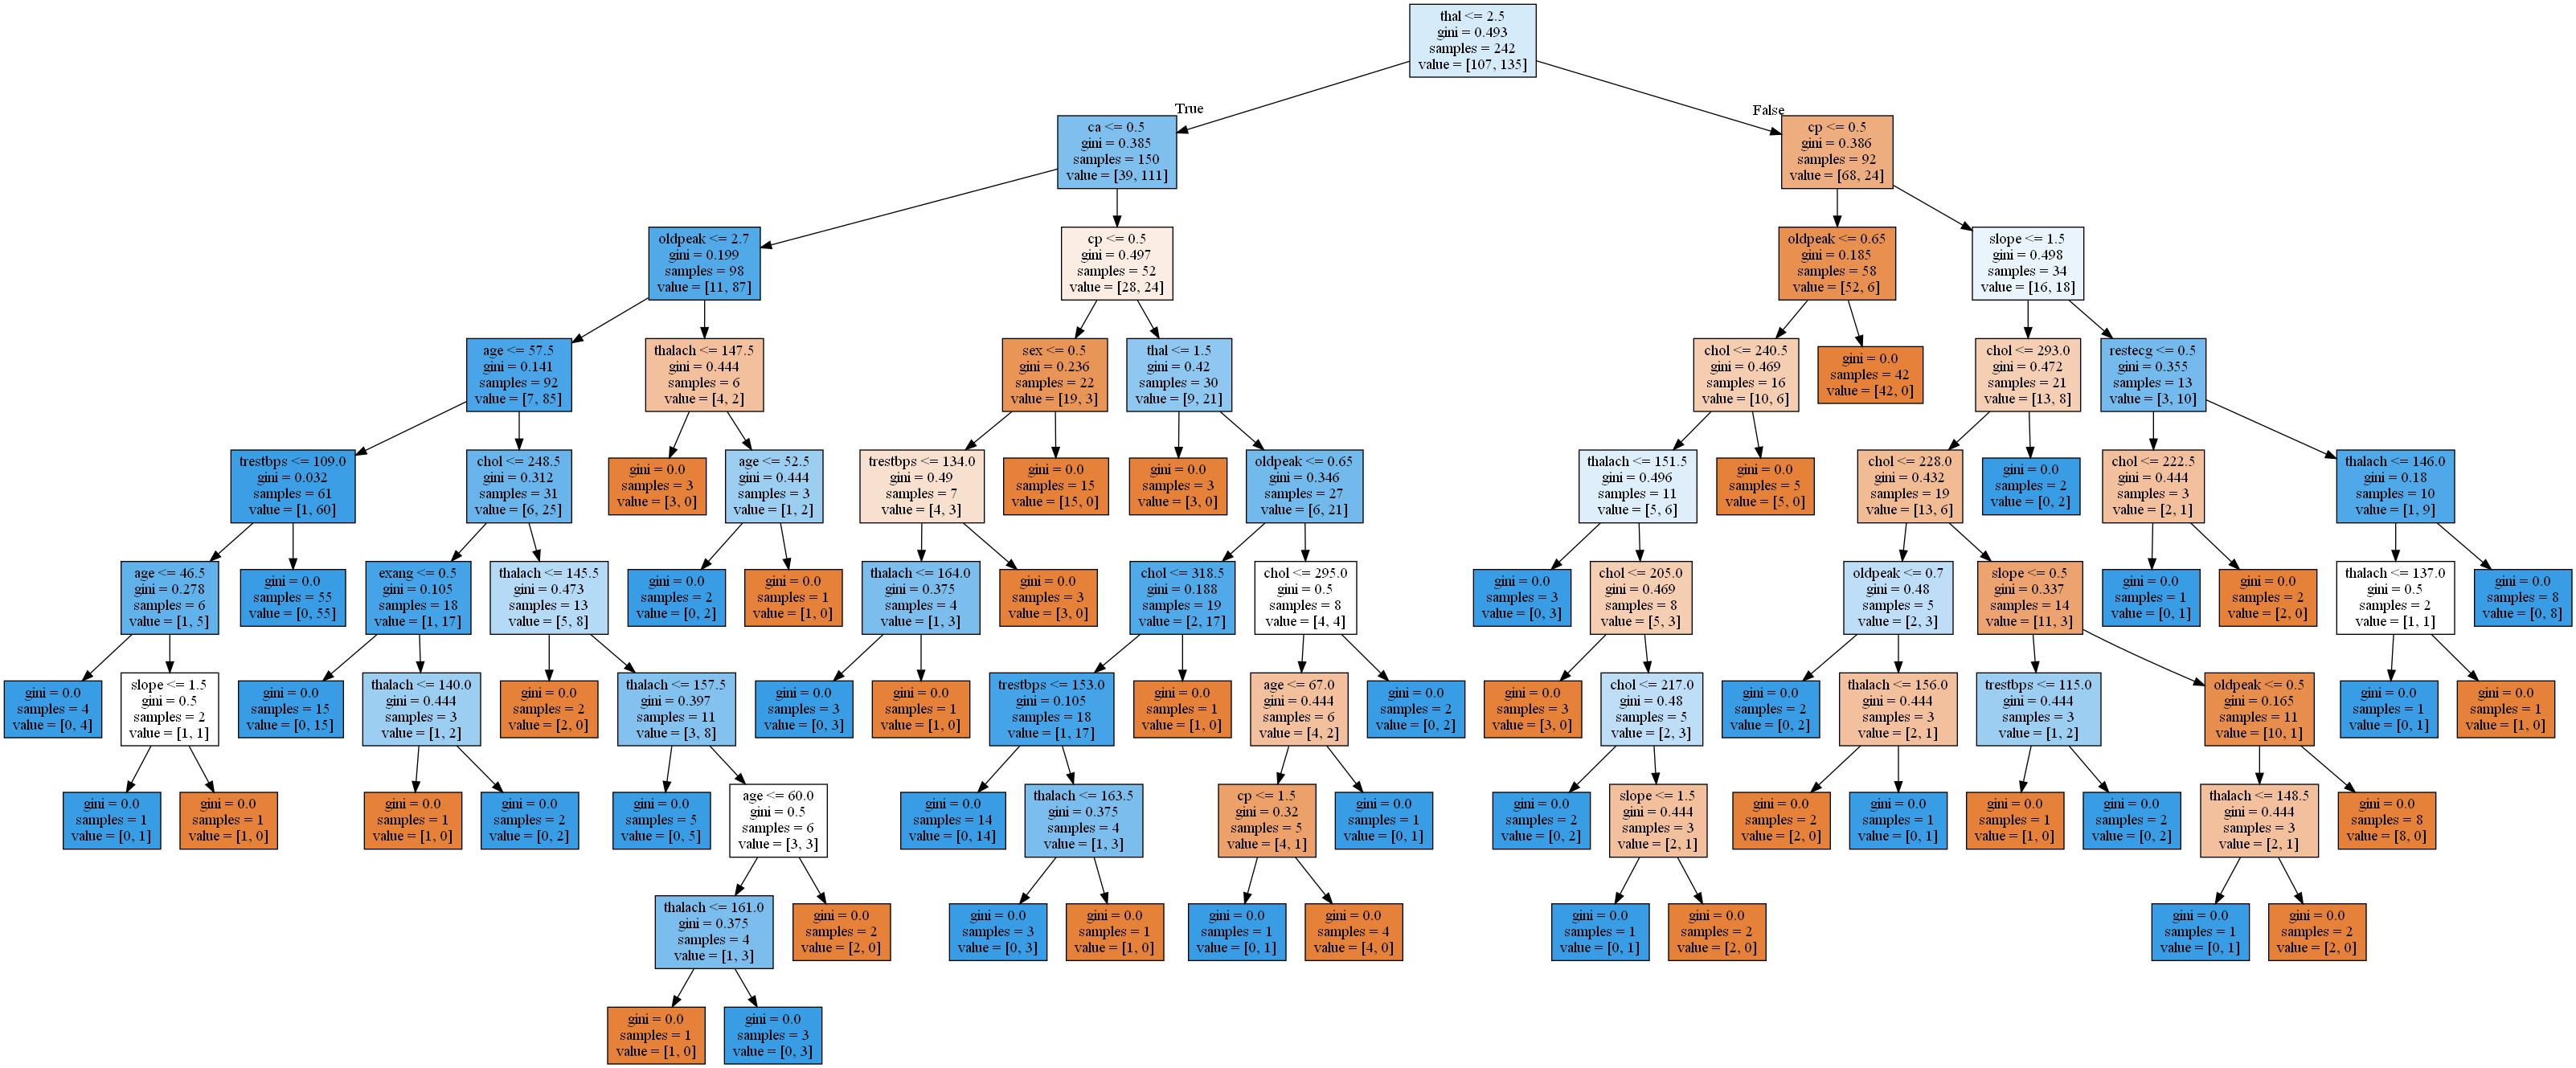

In [7]:
def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

    
tree_graph_to_png(tree, feature_names=df.columns, 
                 png_file_to_save='decision_tree.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "decision_tree.png"
Image(filename = PATH , width=500, height=200)

In [8]:
tree_pred = tree.predict(X_holdout)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

tree_pred = tree.predict(X_holdout)

In [9]:
cm = pd.DataFrame(
    confusion_matrix(y_holdout,tree_pred,labels=[1,0]),
    index = ['true:1','ture:0'],
    columns= ['pred:1','pred:0'])



In [10]:
accuracy_score(y_holdout, tree_pred)
print (f" Test Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}")
print (f" Test Precision for decision tree trained is { precision_score(y_holdout, tree_pred)}")
print (f" Test Recall for decision tree trained is {recall_score(y_holdout, tree_pred)}")


 Test Accuracy for decision tree is 0.7540983606557377
 Test Precision for decision tree trained is 0.7777777777777778
 Test Recall for decision tree trained is 0.7


In [11]:
#tree.get_depth()
tree.n_features_in_

9

In [12]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,15),
               'max_features': range(1,14)}

tree_grid = GridSearchCV(tree,tree_params, cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)


Fitting 5 folds for each of 182 candidates, totalling 910 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'max_features': range(1, 14)},
             verbose=True)

In [13]:
print (f"Best parameters are {tree_grid.best_params_}") 

Best parameters are {'max_depth': 4, 'max_features': 8}


In [14]:
tree_grid.best_score_

0.780952380952381

In [15]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8032786885245902

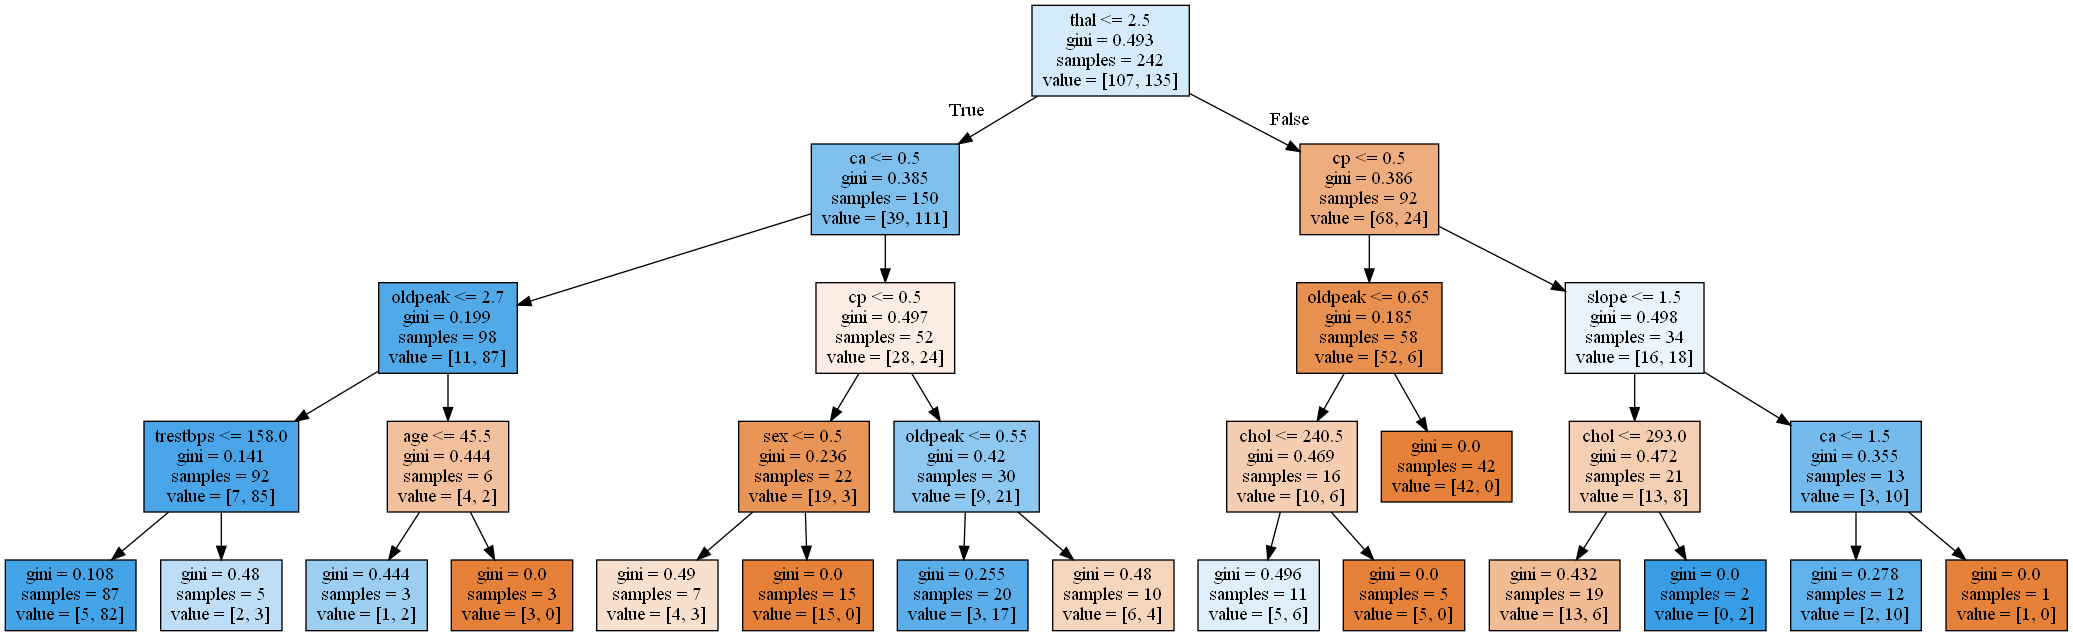

In [16]:
tree_graph_to_png(tree=tree_grid.best_estimator_, feature_names=df.columns, png_file_to_save='topic3_decision_tree4.png')


from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree4.png"
Image(filename = PATH , width=900, height=900)

In [28]:
from sklearn.ensemble import RandomForestClassifier

forest_tree = RandomForestClassifier(n_estimators=10)

forest_tree.fit(X_train, y_train)

estimator = forest_tree.estimators_[1]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = df.columns,
                class_names = "target",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

IndexError: list index out of range

In [29]:
forest_tree_pred = forest_tree.predict(X_holdout)
forest_cm = pd.DataFrame(
    confusion_matrix(y_holdout,forest_tree_pred,labels=[1,0]),
    index = ['true:1','ture:0'],
    columns= ['pred:1','pred:0'])

forest_cm

pred:1  pred:0
true:1      23       7
ture:0       3      28

In [30]:
accuracy_score(y_holdout, forest_tree_pred)
print (f" Test Accuracy for decision tree is {accuracy_score(y_holdout, forest_tree_pred)}")
print (f" Test Precision for decision tree trained is { precision_score(y_holdout, forest_tree_pred)}")
print (f" Test Recall for decision tree trained is {recall_score(y_holdout, forest_tree_pred)}")


 Test Accuracy for decision tree is 0.8360655737704918
 Test Precision for decision tree trained is 0.8846153846153846
 Test Recall for decision tree trained is 0.7666666666666667


In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,15),
               'max_features': range(1,14)}

forest_tree_grid = GridSearchCV(forest_tree,tree_params, cv=5, n_jobs=-1, verbose=True)

forest_tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 182 candidates, totalling 910 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'max_depth': range(1, 15),
                         'max_features': range(1, 14)},
             verbose=True)

In [24]:
print (f"Best parameters are {forest_tree_grid.best_params_}") 

Best parameters are {'max_depth': 7, 'max_features': 3}


In [25]:
forest_tree_grid.best_score_

0.8141156462585034

In [31]:
accuracy_score(y_holdout, forest_tree_grid.predict(X_holdout))
precision_score(y_holdout, forest_tree_grid.predict(X_holdout))

0.8

In [27]:
forest_tree.get_params()
#forest_tree.n_features_in_

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#post-prune of the Decision Tree
